<table>
    <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="70%" align="left"></a></td>
        <td style="background-color:#ffffff;" width="*"></td>
        <td  style="background-color:#ffffff;vertical-align:text-top;"><a href="https://qsoftware.lu.lv" target="_blank"><img src="..\images\logo.jpg" width="25%" align="right"></a></td>        
    </tr>
    <tr><td colspan="3" align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        prepared by Maksim Dimitrijev
    </td></tr>
    <tr><td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Grover's Search: Implementation</h2>

<a id="task1"></a>
<h3>Task 1</h3>

Implement the query operation for $n=2$ ($N=4$). Define a function which marks any one of asked elements.

As a result you need to define the following function: <i>query(circuit,quantum_reg,number)</i>, where:
<ul>
    <li><i>circuit</i> allows to pass the quantum circuit;</li>
    <li><i>quantum_reg</i> allows to pass the quantum register;</li>
    <li><i>number</i> is the number of marked element, between 0 and 3, where 0 corresponds to 00 and 3 corresponds to 11 (like binary numbers :) ).</li>
</ul>

<h3>Solution</h3>

In [ ]:
#number - marked element, between 0 and 3.
def query(circuit,quantum_reg,number):
    # prepare ancilla qubit
    circuit.x(quantum_reg[2])
    circuit.h(quantum_reg[2])

    if(number%2 == 0):
        circuit.x(quantum_reg[0])
    if(number < 2):
        circuit.x(quantum_reg[1])
    circuit.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[2])
    if(number < 2):
        circuit.x(quantum_reg[1])
    if(number%2 == 0):
        circuit.x(quantum_reg[0])

    # put ancilla qubit back into state |0>
    circuit.h(quantum_reg[2])
    circuit.x(quantum_reg[2])

You can play around with the following code to see that your function is implementing the query operation. How to use this to mark 2 elements?

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg3 =  QuantumRegister(3)
creg3 = ClassicalRegister(3)

mycircuit3 = QuantumCircuit(qreg3,creg3)

#Any value between 0 and 3.
query(mycircuit3,qreg3,1)
#Uncomment the next line to mark additional element.
#query(mycircuit3,qreg3,2)

job = execute(mycircuit3,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit3,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

<a id="task2"></a>
<h3>Task 2 (Optional, challenging)</h3>

Implement the query operation for $n=3$ ($N=8$).

To implements this operation you will need 5 qubits (1 additional qubit to implement controlled operations + ancilla). Use the qubit 3 as additional qubit and qubit 4 as ancilla.

<h3>Solution</h3>

In [ ]:
#number - marked element, between 0 and 7.
def big_query(circuit,quantum_reg,number):
    # prepare ancilla qubit
    circuit.x(quantum_reg[4])
    circuit.h(quantum_reg[4])

    if(number%2 == 0):
        circuit.x(quantum_reg[0])
    if(number%4 < 2):
        circuit.x(quantum_reg[1])
    if(number < 4):
        circuit.x(quantum_reg[2])
    circuit.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[3])
    circuit.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[4])
    circuit.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[3])
    if(number < 4):
        circuit.x(quantum_reg[2])
    if(number%4 < 2):
        circuit.x(quantum_reg[1])
    if(number%2 == 0):
        circuit.x(quantum_reg[0])

    # put ancilla qubit back into state |0>
    circuit.h(quantum_reg[4])
    circuit.x(quantum_reg[4])

You can play around with the following code to see that your function is implementing the query operation.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg =  QuantumRegister(5)
big_creg = ClassicalRegister(5)

big_mycircuit = QuantumCircuit(big_qreg,big_creg)

#Any value between 0 and 7.
big_query(big_mycircuit,big_qreg,5)

job = execute(big_mycircuit,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit,decimals=3)
# print top-left 8x8 entries of the matrix.
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

<a id="task3"></a>
<h3>Task 3</h3>

Implement the inversion operation for 4 elements.

In the implementation the ancilla qubit will be qubit 2, while qubits for control are 0 and 1. As a result you should obtain the following values in the top-left $4 \times 4$ entries:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

<h3>Solution</h3>

In [1]:
def inversion(circuit,quantum_reg):
    #step 1
    circuit.x(quantum_reg[2])
    circuit.h(quantum_reg[2])
    
    #step 2
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 3
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[2])
    
    #step 4
    circuit.x(quantum_reg[2])

    #step 5
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])

    #step 6
    circuit.h(quantum_reg[2])
    circuit.x(quantum_reg[2])

Below you can check the matrix of your inversion operator and how does the circuit look like. We are interested in top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

 -0.5  0.5  0.5  0.5  0.0 -0.0 -0.0  0.0
  0.5 -0.5  0.5  0.5 -0.0  0.0  0.0 -0.0
  0.5  0.5 -0.5  0.5 -0.0  0.0  0.0 -0.0
  0.5  0.5  0.5 -0.5  0.0 -0.0 -0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0 -0.0
  0.0  0.0  0.0  0.0  0.0  1.0 -0.0  0.0
  0.0  0.0  0.0  0.0  0.0 -0.0  1.0  0.0
  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  1.0


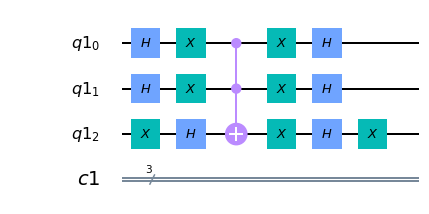

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg4 =  QuantumRegister(3)
creg4 = ClassicalRegister(3)

mycircuit4 = QuantumCircuit(qreg4,creg4)

inversion(mycircuit4,qreg4)

job = execute(mycircuit4,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit4,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
mycircuit4.draw(output='mpl')

<a id="task4"></a>
<h3>Task 4 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to ensure the operation of 3 qubits controlling the other qubit.

In the implementation the ancilla qubit will be qubit 4, while qubits for control are 0, 1 and 2; qubit 3 is used to ensure this multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

<h3>Solution</h3>

In [ ]:
def big_inversion(circuit,quantum_reg):
    circuit.x(quantum_reg[4])
    circuit.h(quantum_reg[4])

    for i in range(3):
        circuit.h(quantum_reg[i])
        circuit.x(quantum_reg[i])

    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[3])
    circuit.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[4])
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[3])
    
    circuit.x(quantum_reg[4])

    for i in range(3):
        circuit.x(quantum_reg[i])
        circuit.h(quantum_reg[i])

    circuit.h(quantum_reg[4])
    circuit.x(quantum_reg[4])

Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg2 =  QuantumRegister(5)
big_creg2 = ClassicalRegister(5)

big_mycircuit2 = QuantumCircuit(big_qreg2,big_creg2)

big_inversion(big_mycircuit2,big_qreg2)

job = execute(big_mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit2,decimals=3)
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)